In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read training data
df_train = pd.read_csv('../input/taxihotspotspredict/taxi_data/train_hire_stats.csv')
df_train.shape

(219599, 4)

In [3]:
#Check weekday & workday
#holidays連假的平常日
#workdays連假的補班日
#holidays = set([])
#makeupworkdays= set([])
holidays=set(['2016/02/08', '2016/02/09', '2016/02/10', '2016/02/11', '2016/02/12','2016/02/29', '2016/04/04', '2016/04/05', '2016/06/09', '2016/06/10', 
'2016/09/15', '2016/09/16', '2016/10/10', '2017/01/02', '2017/01/27', '2017/1/30', '2017-02-01','2017-02-27', '2017-02-28'])
makeupworkdays = set(['2016/06/04', '2016/09/10', '2017-02-18']) #補班

In [4]:
#Declare weekday & workday
isworkday = np.ones((len(df_train),), dtype=int)
weekday = np.ones((len(df_train),), dtype=int)
month = np.ones((len(df_train),), dtype=int)
day = np.ones((len(df_train),), dtype=int)

In [5]:
#Compute weekday & workday
#weekday()
#0 == Monday, #1 == Tuesday, #2 == Wednesday,  #3 == Thursday,  #4 == Friday,  #5 == Saturday, #6 == Sunday
#存月份
from datetime import datetime

for index, row in df_train.iterrows():
    dd = datetime.strptime(row['Date'], "%Y/%m/%d")
    weekday[index]= dd.weekday() 
    month[index] = dd.month
    if row['Date'] in holidays:
        isworkday[index] = 0
        weekday[index]=5
    else:        
        if weekday[index] >=5 :
            isworkday[index] = 0
        if row['Date'] in makeupworkdays:
            isworkday[index] = 1
            weekday[index]=4
            print(row['Date'])
            
    if dd.day <= 10:
        day[index] = 0
    elif dd.day>10 and dd.day<=20:
        day[index] = 1
    else:
        day[index] = 2
        
    


In [6]:
#Build a new dataframe from the training data
RawX = pd.DataFrame(df_train[["Zone_ID", "Hour_slot","Hire_count"]])
RawX['isworkday'] = isworkday
RawX['weekday'] = weekday
#RawX['month'] = month
#RawX['day'] = day


,Zone_ID,Date,Hour_slot,Hire_count
0,1,2016/2/1,0,0
1,1,2016/2/1,1,0
2,1,2016/2/1,2,0
3,1,2016/2/1,3,0
4,1,2016/2/1,4,0


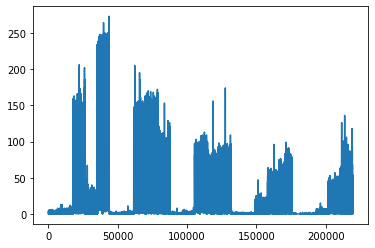

In [7]:
#See the raw input data
#df_train2 = df_train.sort_values(by=['Hour_slot'])
plt.plot(df_train['Hire_count'])
#plt.plot(df_train['Hour_slot'])
#plt.plot(df_train['Zone_ID'])
#RawX.to_csv('Inputdata.csv')
df_train.head()

In [8]:
from sklearn.utils import shuffle
RawX = shuffle(RawX)
fliter = (RawX["isworkday"] == 1)
X_workday = pd.DataFrame(RawX[fliter])
X_workday= X_workday.drop('isworkday',axis=1)
X_workday= X_workday.drop('Hire_count',axis=1)
X_workday.head()
fliter2 = (RawX["isworkday"] == 0)
X_notworkday = pd.DataFrame(RawX[fliter2])
X_notworkday = X_notworkday.drop('isworkday',axis=1)
X_notworkday= X_notworkday.drop('Hire_count',axis=1)
X_notworkday.head()



,Zone_ID,Hour_slot,weekday
6850,1,10,5
82219,10,20,5
131182,15,23,5
213980,25,21,5
147262,17,23,6


In [9]:
#Use OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc2 = OneHotEncoder(handle_unknown='ignore')

In [10]:
#Build encoder
enc.fit_transform(X_workday)
enc.categories_

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 array([0, 1, 2, 3, 4])]

In [11]:
#Transform data into one hot vector
X_work = enc.transform(X_workday).toarray()
X_work.shape

(155999, 54)

In [12]:
enc2.fit_transform(X_notworkday)
enc2.categories_

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 array([5, 6])]

In [13]:
#Transform data into one hot vector
X_notwork = enc2.transform(X_notworkday).toarray()
X_notwork.shape

(63600, 51)

In [14]:
#See the cooked input data
X_work[0:3, :]
X_notwork[0:3, :]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 0.]])

In [15]:
#Resize y into (0,1)
max_val  =300.0
y_work = pd.DataFrame(RawX[fliter])
y_work = y_work["Hire_count"].values/max_val

y_notwork = pd.DataFrame(RawX[fliter2])
y_notwork = y_notwork["Hire_count"].values/max_val
y_work.shape

(155999,)

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout,RepeatVector,LSTM


In [17]:
# create and fit a Baseline Neural Network Model
# 128 64
# 256 128
model = Sequential()
'''
model.add(Dense(128, activation='relu', input_dim=69,kernel_initializer = 'normal'))
#model.add(Dropout(0.1))
#model.add(Dense(128, activation='relu',kernel_initializer = 'normal'))
#model.add(Dense(64, activation='relu',kernel_initializer = 'normal'))
#model.add(Dense(64, activation='softmax',kernel_initializer = 'normal'))
model.add(Dense(64, activation='softmax',kernel_initializer = 'normal'))
#model.add(Dense(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))


#model.add(Dense(1024, activation='relu', input_dim=69))
#model.add(Dense(units=64, activation='relu'))
model.add(Dense(128, activation='relu', input_dim=69))
model.add(Dense(units=64, activation='relu'))
#model.add(Dense(64, activation='relu', input_dim=69))
#model.add(Dense(units=64, activation='relu'))
#model.add(LSTM(16, return_sequences=False))
model.add(Dropout(0.1))
model.add(Dense(1))
'''
model.add(Dense(128, activation='relu', input_dim=54))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

In [18]:

num1 = X_work.shape[0] // 10 * 8
num2 = X_work.shape[0] // 10 * 9

train_ins = X_work[:num1]
train_ous = y_work[:num1]
valid_ins = X_work[num1:num2]
valid_ous = y_work[num1:num2]
test_ins = X_work[num2:]
test_ous = y_work[num2:]
# callbacks=[callback],
#model.compile(loss='mse', optimizer='adam')
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam'))
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3)
# model.fit(train_ins, train_ous, batch_size=1024, epochs=10, verbose=1)
model.fit(train_ins, train_ous, validation_data=(valid_ins, valid_ous), epochs=10, batch_size=1024, verbose=2)

Epoch 1/10
122/122 - 2s - loss: 0.0059 - val_loss: 0.0017
Epoch 2/10
122/122 - 0s - loss: 0.0016 - val_loss: 0.0011
Epoch 3/10
122/122 - 0s - loss: 0.0012 - val_loss: 9.8045e-04
Epoch 4/10
122/122 - 0s - loss: 0.0011 - val_loss: 9.6994e-04
Epoch 5/10
122/122 - 0s - loss: 0.0011 - val_loss: 9.1431e-04
Epoch 6/10
122/122 - 0s - loss: 0.0011 - val_loss: 9.3741e-04
Epoch 7/10
122/122 - 0s - loss: 0.0011 - val_loss: 9.0871e-04
Epoch 8/10
122/122 - 0s - loss: 0.0011 - val_loss: 9.3886e-04
Epoch 9/10
122/122 - 0s - loss: 0.0010 - val_loss: 9.0514e-04
Epoch 10/10
122/122 - 0s - loss: 0.0010 - val_loss: 9.2060e-04


In [19]:
model2 = Sequential()
'''
model2.add(Dense(256, activation='relu', input_dim=66,kernel_initializer = 'normal'))
#model2.add(Dropout(0.1))
#model2.add(Dense(128, activation='relu',kernel_initializer = 'normal'))
#model2.add(Dense(64, activation='relu',kernel_initializer = 'normal'))
#model2.add(Dense(64, activation='softmax',kernel_initializer = 'normal'))
model2.add(Dense(128, activation='softmax',kernel_initializer = 'normal'))
#model2.add(Dense(units=10, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1))

model2.add(Dense(128, activation='relu', input_dim=66))
model2.add(Dense(64, activation='softmax'))
model2.add(RepeatVector(50))
model2.add(LSTM(16, return_sequences=False))
model2.add(Dense(1))

#model2.add(Dense(1024, activation='relu', input_dim=66))
#model2.add(Dense(units=64, activation='relu'))
model2.add(Dense(128, activation='relu', input_dim=66))
model2.add(Dense(units=64, activation='relu'))
#model2.add(Dense(64, activation='relu', input_dim=66))
#model2.add(Dense(units=64, activation='relu'))
#model2.add(LSTM(16, return_sequences=False))
model2.add(Dropout(0.1))
model2.add(Dense(1))
'''
model2.add(Dense(128, activation='relu', input_dim=51))
model2.add(Dense(units=64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1))

In [20]:
num1 = X_notwork.shape[0] // 10 * 8
num2 = X_notwork.shape[0] // 10 * 9

train_ins2 = X_notwork[:num1]
train_ous2 = y_notwork[:num1]
valid_ins2 = X_notwork[num1:num2]
valid_ous2 = y_notwork[num1:num2]
test_ins2 = X_notwork[num2:]
test_ous2 = y_notwork[num2:]
#model2.compile(loss='mse', optimizer='adam')
model2.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam'))
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3)
# model.fit(train_ins, train_ous, batch_size=1024, epochs=10, verbose=1)
model2.fit(train_ins2, train_ous2, validation_data=(valid_ins2, valid_ous2), epochs=10,  batch_size=1024, verbose=1)

Epoch 1/10
50/50 [==============================] - 1s 5ms/step - loss: 0.0082 - val_loss: 0.0018
Epoch 2/10
50/50 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 9.1378e-04
Epoch 3/10
50/50 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 6.9132e-04
Epoch 4/10
50/50 [==============================] - 0s 3ms/step - loss: 8.6278e-04 - val_loss: 6.3179e-04
Epoch 5/10
50/50 [==============================] - 0s 3ms/step - loss: 7.6771e-04 - val_loss: 5.8357e-04
Epoch 6/10
50/50 [==============================] - 0s 3ms/step - loss: 7.1318e-04 - val_loss: 5.7116e-04
Epoch 7/10
50/50 [==============================] - 0s 3ms/step - loss: 6.9796e-04 - val_loss: 5.7488e-04
Epoch 8/10
50/50 [==============================] - 0s 3ms/step - loss: 6.6593e-04 - val_loss: 5.5476e-04
Epoch 9/10
50/50 [==============================] - 0s 3ms/step - loss: 6.1133e-04 - val_loss: 5.5136e-04
Epoch 10/10
50/50 [==============================] - 0s 3ms/st

In [21]:
prediction = model.predict(test_ins) * max_val
target = test_ous * max_val

mse = np.mean(np.sqrt(np.power(prediction - np.array(target),2)))
print('MSE: {}'.format(mse))

prediction2 = model2.predict(test_ins2) * max_val
target2 = test_ous2 * max_val

mse2 = np.mean(np.sqrt(np.power(prediction2 - np.array(target2),2)))
print('MSE: {}'.format(mse2))

MSE: 28.84194192688078
MSE: 21.374475997408844


In [22]:
df_test = pd.read_csv('../input/taxihotspotspredict/taxi_data/test_hire_stats.csv')
df_test.shape

(6048, 5)

In [23]:
#Declare weekday & workday
isworkday2 = np.ones((len(df_test),), dtype=int)
weekday2 = np.ones((len(df_test),), dtype=int)
month2 = np.ones((len(df_test),), dtype=int)
day2 = np.ones((len(df_test),), dtype=int)

In [24]:
for index, row in df_test.iterrows():
    dd = datetime.strptime(row['Date'], "%Y-%m-%d")
    weekday2[index]= dd.weekday() 
    month2[index] = dd.month
    if dd.day <= 10:
        day2[index] = 0
    elif dd.day>10 and dd.day<=20:
        day2[index] = 1
    else:
        day2[index] = 2
    if row['Date'] in holidays:
        isworkday2[index] = 0
        weekday2[index]=5
    else:        
        if weekday2[index] >=5 and row['Date'] not in makeupworkdays:
            isworkday2[index] = 0
        if row['Date']  in makeupworkdays:
            weekday2[index]=4


In [25]:
Test = pd.DataFrame(df_test[["Zone_ID", "Hour_slot",'Test_ID']])
Test['isworkday'] = isworkday2
Test['weekday'] = weekday2
#Test['month'] = month2
#Test['day'] = day2

In [26]:
fliter = (Test["isworkday"] == 1)
X_workdaytest = pd.DataFrame(Test[fliter])
X_workdaytest= X_workdaytest.drop('isworkday',axis=1)
X_worktest= X_workdaytest.drop('Test_ID',axis=1)
X_worktest.head()
fliter2 = (Test["isworkday"] == 0)
X_notworkdaytest = pd.DataFrame(Test[fliter2])
X_notworkdaytest = X_notworkdaytest.drop('isworkday',axis=1)
X_notworktest= X_notworkdaytest.drop('Test_ID',axis=1)
X_notworkdaytest.head()

,Zone_ID,Hour_slot,Test_ID,weekday
0,7,0,0,5
1,7,1,1,5
2,7,2,2,5
3,7,3,3,5
4,7,4,4,5


In [27]:
X_worktest = enc.transform(X_worktest).toarray()
X_worktest.shape

(3888, 54)

In [28]:
X_notworktest = enc2.transform(X_notworktest).toarray()
X_notworktest.shape

(2160, 51)

In [29]:
yt_work = model.predict(X_worktest)*max_val
yt_notwork = model2.predict(X_notworktest)*max_val

TestY1 = pd.DataFrame(X_workdaytest[['Test_ID']])
TestY2 = pd.DataFrame(X_notworkdaytest[['Test_ID']])
TestY1['Hire_count'] = yt_work
TestY2['Hire_count'] = yt_notwork
TestY=pd.concat([TestY1, TestY2])
#yt2 = round(yt)
#yt2 = yt.astype(int)
TestY.head()
TestY = TestY.sort_values(by=['Test_ID'])

In [30]:
yt = np.ones((len(TestY)), dtype=int)

for index, row in TestY.iterrows():
    if np.around(row['Hire_count'])<= 0:
        yt[index]=  0
    else:        
        yt[index]=int(np.around(row['Hire_count']))
    

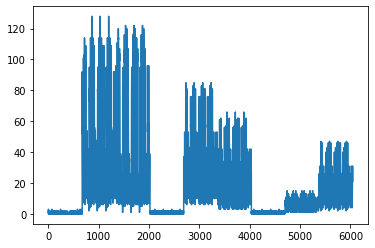

In [31]:
plt.plot(yt)

In [32]:
df_test["Hire_count"] = yt
df_test.head()

,Test_ID,Zone_ID,Date,Hour_slot,Hire_count
0,0,7,2017-02-01,0,1
1,1,7,2017-02-01,1,3
2,2,7,2017-02-01,2,0
3,3,7,2017-02-01,3,2
4,4,7,2017-02-01,4,1


In [33]:
dfOut = df_test
dfOut.to_csv('Result.csv', index=False)